# ASSIGNMENT 1
#Name--Preetesh Verma
#Entry Number--2018eeb1171

In [2]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import sklearn

In [4]:
# including the dataset
from sklearn.datasets import load_boston

In [5]:
house_price = load_boston()

In [6]:
# converting the dataset into a dataframe
df=pd.DataFrame(house_price.data,columns=house_price.feature_names)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
df['PRICE'] = house_price.target

In [10]:
df['PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# splitting the dataset into training and test sets with 7:3 ratio along with randomly shuffling
X_train, X_test, y_train, y_test = train_test_split(df, df['PRICE'], test_size=0.30, random_state=42)

In [13]:
# checking the shapes of the formed training and tests sets
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(354, 14)
(152, 14)
(152,)
(354,)


In [14]:
y_train.head()

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
Name: PRICE, dtype: float64

In [15]:
y_train.to_frame() 
y_test.to_frame()

,PRICE
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
441,17.1
23,14.5
225,50.0
433,14.3


In [16]:
X_train.head()
X_train.shape

(354, 14)

In [17]:
# deleting the Price Column from the training part as it is the Output variable
del X_train['PRICE']
X_train.shape
del X_test['PRICE']
X_test.shape

(152, 13)

## Task 1

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# normal linear REgression
reg=LinearRegression().fit(X_train,y_train)

In [20]:
print(reg.coef_)
print(reg.intercept_)

[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
31.63108403569186


In [21]:
predictor_variables=X_train.columns
predictor_variables

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

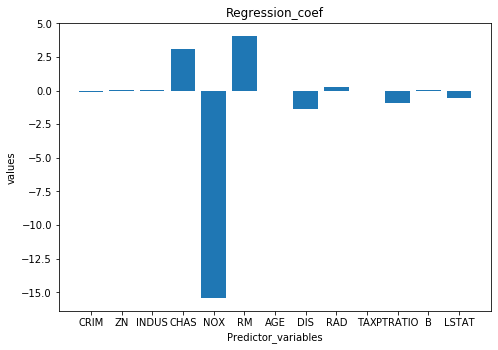

In [22]:
# plotting the BAR Graphs for the independent variables and their regression coefficients
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
graph.bar(predictor_variables,reg.coef_)
plt.title('Regression_coef')
plt.ylabel('values')
plt.xlabel('Predictor_variables')
plt.show()

## Task 3

In [23]:
from sklearn.linear_model import Lasso

In [24]:
# room, residential zone, highway access, crime rate and tax
new_X_train=X_train
new_X_test=X_test
new_X_train.shape

(354, 13)

In [25]:
df=pd.DataFrame()
ls=[]
residualsLasso=[]
residuals_lasso_full=[]
residuals_lasso_full=[]
alpha=0
# for 0-200 values of alpha
for i in range(200):
    clf = Lasso(alpha)
    # fitting the New_X_train dataset with Lasso.
    clf.fit(new_X_train,y_train)
    predictions=clf.predict(new_X_train)
    # computing the residuals and storing in list.
    residualsLasso.append(predictions-y_train)
    ls.append(clf.coef_)
    myarray = np.asarray(clf.coef_)
    myarray.transpose()
    # fitting and predicting the Lasso Model on X_test as well for all the 200 alpha values.
    clf.fit(X_test,y_test)
    predictions1=clf.predict(X_test)
#     # computing the residuals and storing in list.
    residuals_lasso_full.append(predictions1-y_test)
    alpha=alpha+1
print(np.shape(ls))

C:\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Anaconda\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3990.550223273617, tolerance: 3.111537141242938
  positive)
C:\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Anaconda\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: C

(200, 13)


In [26]:
# residuals_lasso_full=[]
# # alpha=0
# # for 0-200 values of alpha
# for i in range(200):
#     clf_a = Lasso(alpha)
#     # fitting and predicting the Lasso Model on X_test as well for all the 200 alpha values.
#     clf_a.fit(X_test,y_test)
#     predictions=clf_a.predict(X_test)
#      # computing the residuals and storing in list.
#     residuals_lasso_full.append(predictions-y_test)
#     alpha=alpha+1
# print(np.shape(residuals_lasso_full))

In [27]:
# checking the dataframe for the regression coefficents of the five predictor variables for 200 alpha values.
df=df.append(ls)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.133470,0.035809,0.049523,3.119835,-15.417061,4.057199,-0.010821,-1.385998,0.242727,-0.008702,-0.910685,0.011794,-0.547113
1,-0.091916,0.034667,-0.000000,0.000000,-0.000000,1.281317,0.011440,-0.616021,0.191501,-0.009540,-0.703350,0.010832,-0.779921
2,-0.048873,0.020131,-0.000000,0.000000,0.000000,0.000000,0.036079,-0.000000,0.097192,-0.005776,-0.568270,0.009488,-0.857383
3,-0.017259,0.023171,-0.000000,0.000000,0.000000,0.000000,0.032872,-0.000000,0.000000,-0.003837,-0.291573,0.009102,-0.843261
4,-0.000042,0.028042,-0.000000,0.000000,0.000000,0.000000,0.030696,-0.000000,0.000000,-0.005969,-0.038245,0.009047,-0.823998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.018449,-0.000000,0.000000,-0.000000
196,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.018413,-0.000000,0.000000,-0.000000
197,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.018377,-0.000000,0.000000,-0.000000
198,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.018341,-0.000000,0.000000,-0.000000


In [28]:
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [29]:
new_df=df[['CRIM','RM','TAX','ZN','RAD']]

In [30]:
new_df.head()

,CRIM,RM,TAX,ZN,RAD
0,-0.133470,4.057199,-0.008702,0.035809,0.242727
1,-0.091916,1.281317,-0.009540,0.034667,0.191501
2,-0.048873,0.000000,-0.005776,0.020131,0.097192
3,-0.017259,0.000000,-0.003837,0.023171,0.000000
4,-0.000042,0.000000,-0.005969,0.028042,0.000000


Text(0, 0.5, 'values')

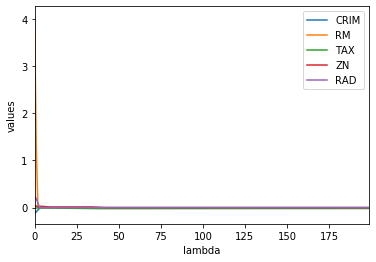

In [31]:
# four lines showing the variation of the predictor variable regression coefficients with lambda(regularization hyperparameter)
lines = new_df.plot.line()
lines.set_xlabel("lambda")
lines.set_ylabel("values")

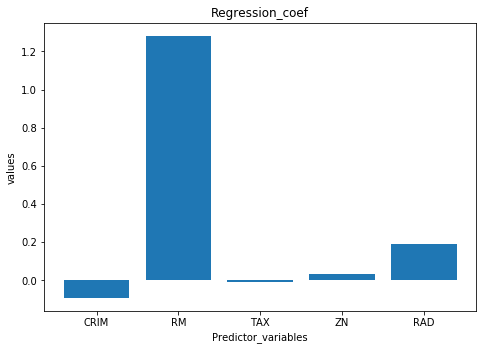

In [32]:
# plotting the grpah of the regression coefficients for alpha =2
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
# here we can plot the grpah for any of the 200 values by just specifying the value in df.iloc[<value>]
graph.bar(new_df.columns,new_df.iloc[1])
plt.title('Regression_coef')
plt.ylabel('values')
plt.xlabel('Predictor_variables')
plt.show()

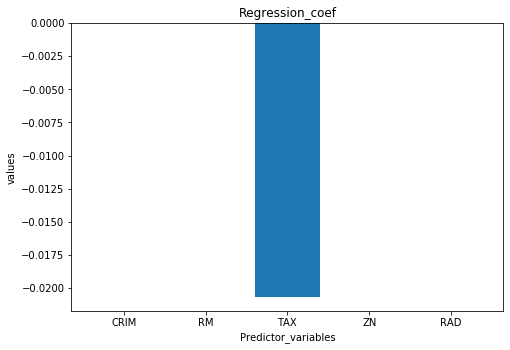

In [33]:
# plotting the grpah of the regression coefficients for alpha =2
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
# here we can plot the grpah for any of the 200 values by just specifying the value in df.iloc[<value>]
graph.bar(new_df.columns,new_df.iloc[100])
plt.title('Regression_coef')
plt.ylabel('values')
plt.xlabel('Predictor_variables')
plt.show()

## Task2

In [34]:
from sklearn.linear_model import Ridge

In [35]:
ls1=[]
alpha=0
residualsRidge=[]
residuals_ridge_full=[]
for i in range(200):
    clf1 = Ridge(alpha)
    # fitting the model for New_X_Train for all the alpha values from 0 to 200.
    clf1.fit(new_X_train,y_train)
    predictionss=clf1.predict(new_X_train)
    # computing the residuals for the training dataset.
    residualsRidge.append(predictionss-y_train)
    ls1.append(clf1.coef_)
    myarray1 = np.asarray(clf1.coef_)
    myarray1.transpose()
    clf1.fit(X_test,y_test)
    predictions1=clf1.predict(X_test)
    # computing the residuals and storing in list.
    residuals_ridge_full.append(predictions1-y_test)
    alpha=alpha+1
print(np.shape(ls))
print(np.shape(residuals_ridge_full))

(200, 13)
(200, 152)


In [36]:
# checking if all the values are stored of the regression coefficients for 200 alpha values.
df1=pd.DataFrame()
df1=df1.append(ls1)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.133470,0.035809,0.049523,3.119835,-15.417061,4.057199,-0.010821,-1.385998,0.242727,-0.008702,-0.910685,0.011794,-0.547113
1,-0.128427,0.036952,0.017914,2.932695,-7.848060,4.063574,-0.017242,-1.271761,0.225494,-0.009381,-0.827105,0.011988,-0.563474
2,-0.126954,0.037495,0.007215,2.797066,-5.258951,4.041246,-0.019185,-1.233265,0.221014,-0.009664,-0.800178,0.012060,-0.571211
3,-0.126380,0.037874,0.001859,2.681141,-3.951820,4.011920,-0.019984,-1.214158,0.219729,-0.009842,-0.787744,0.012099,-0.576653
4,-0.126154,0.038182,-0.001361,2.577558,-3.163566,3.980083,-0.020325,-1.202823,0.219675,-0.009974,-0.781110,0.012124,-0.581112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.129046,0.045243,-0.029776,0.364803,-0.064659,1.482389,0.004502,-0.948376,0.280067,-0.012404,-0.802327,0.011248,-0.763947
196,-0.129028,0.045241,-0.029785,0.363318,-0.064248,1.477761,0.004573,-0.947234,0.280092,-0.012405,-0.802117,0.011245,-0.764234
197,-0.129010,0.045238,-0.029794,0.361845,-0.063842,1.473163,0.004644,-0.946095,0.280117,-0.012406,-0.801905,0.011242,-0.764518
198,-0.128992,0.045236,-0.029802,0.360386,-0.063439,1.468596,0.004715,-0.944959,0.280140,-0.012407,-0.801692,0.011239,-0.764801


In [37]:
df1.shape

(200, 13)

In [38]:
df1.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [39]:
new_df1=df1[['CRIM','RM','TAX','ZN','RAD']]

In [40]:
new_df1.head()

,CRIM,RM,TAX,ZN,RAD
0,-0.133470,4.057199,-0.008702,0.035809,0.242727
1,-0.128427,4.063574,-0.009381,0.036952,0.225494
2,-0.126954,4.041246,-0.009664,0.037495,0.221014
3,-0.126380,4.011920,-0.009842,0.037874,0.219729
4,-0.126154,3.980083,-0.009974,0.038182,0.219675


Text(0, 0.5, 'values')

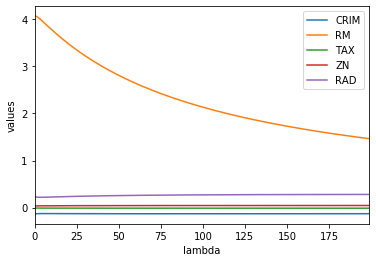

In [41]:
# four lines showing the variation of the predictor variable regression coefficients with lambda(regularization hyperparameter)
lines = new_df1.plot.line()
lines.set_xlabel("lambda")
lines.set_ylabel("values")

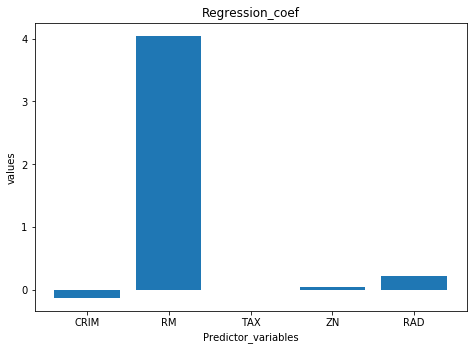

In [42]:
# plotting the grpah of the regression coefficients for alpha =2
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
# here we can plot the grpah for any of the 200 values by just specifying the value in df.iloc[<value>]
graph.bar(new_df1.columns,new_df1.iloc[2])
plt.title('Regression_coef')
plt.ylabel('values')
plt.xlabel('Predictor_variables')
plt.show()

## Task4

In [43]:
# here predicting the residuals for the normal regression model.
predictionlr=reg.predict(X_train)

In [44]:
residuals=(y_train-predictionlr)

In [45]:
residuals_mean=np.mean(np.abs(residuals))
type(residuals)
lst=list(range(0,len(residuals)))

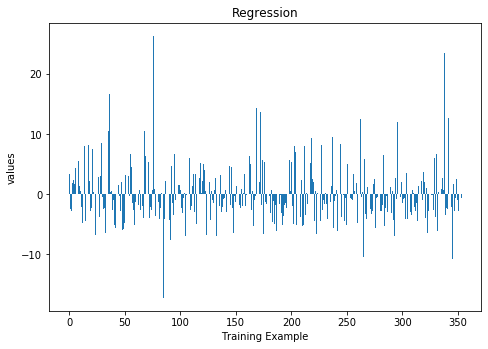

In [46]:
#plotting the graph for the residuals.
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
graph.bar(lst,residuals)
plt.title('Regression')
plt.ylabel('values')
plt.xlabel('Training Example')
plt.show()

In [47]:
lst=list(range(0,354))
np.shape(residualsLasso)

(200, 354)

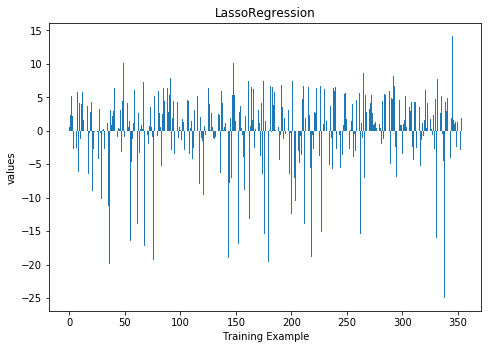

In [48]:
#plotting the graph for the residuals with alpha =2.
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
graph.bar(lst,residualsLasso[2])
plt.title('LassoRegression')
plt.ylabel('values')
plt.xlabel('Training Example')
plt.show()

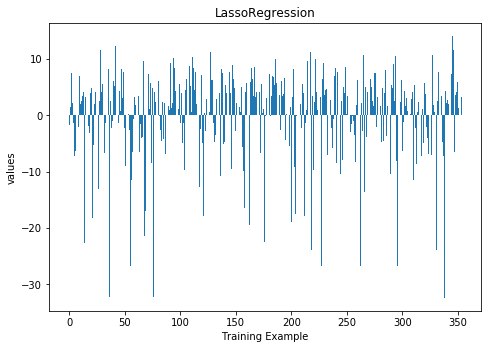

In [49]:
#plotting the graph for the residuals with aplha=100.
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
graph.bar(lst,residualsLasso[100])
plt.title('LassoRegression')
plt.ylabel('values')
plt.xlabel('Training Example')
plt.show()

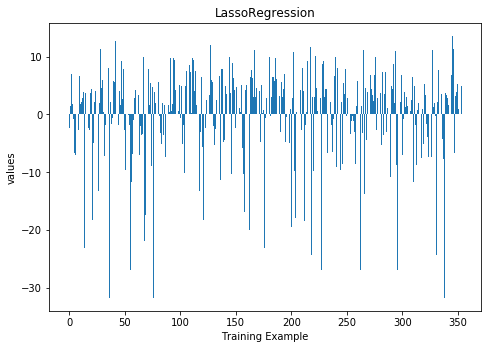

In [50]:
#plotting the graph for the residuals with aplha=190.
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
graph.bar(lst,residualsLasso[199])
plt.title('LassoRegression')
plt.ylabel('values')
plt.xlabel('Training Example')
plt.show()

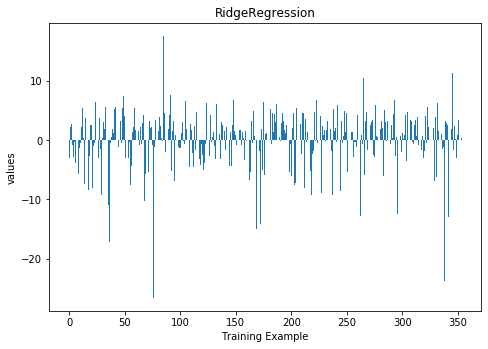

In [51]:
#plotting the graph for the residuals with aplha=2.
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
graph.bar(lst,residualsRidge[2])
plt.title('RidgeRegression')
plt.ylabel('values')
plt.xlabel('Training Example')
plt.show()

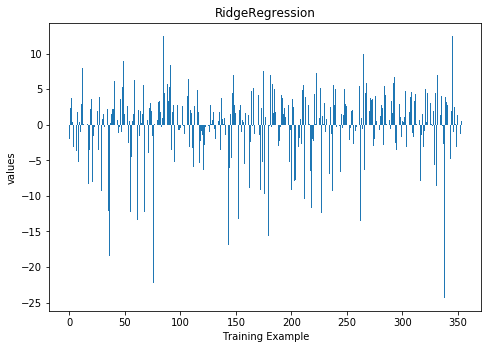

In [52]:
#plotting the graph for the residuals with aplha=100
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
graph.bar(lst,residualsRidge[100])
plt.title('RidgeRegression')
plt.ylabel('values')
plt.xlabel('Training Example')
plt.show()

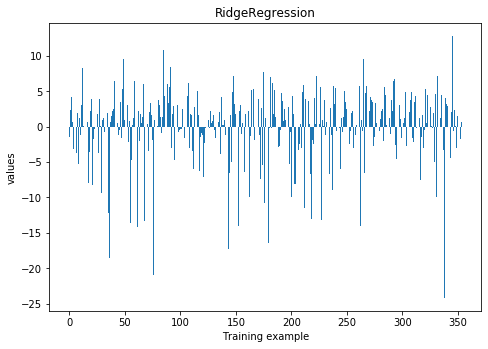

In [53]:
#plotting the graph for the residuals with aplha=199.
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
graph.bar(lst,residualsRidge[199])
plt.title('RidgeRegression')
plt.ylabel('values')
plt.xlabel('Training example')
plt.show()

## Task5

In [54]:
# computing the mean error for lasso
Lasso_error=np.mean(np.abs((residualsLasso)),axis=1)

In [55]:
Lasso_error.shape

(200,)

In [56]:
# computing the mean error for Ridge
Ridge_error=np.mean(np.abs((residualsRidge)),axis=1)

In [57]:
Ridge_error.shape

(200,)

In [58]:
dff=pd.DataFrame(Lasso_error)

In [59]:
dff.head()

,0
0,3.356827
1,3.653827
2,4.050305
3,4.189873
4,4.309315


In [60]:
dff['Ridge Error']=Ridge_error

In [61]:
dff.columns=['Lasso Error train','Ridge Error Train']

In [62]:
dff.index.title=['Alpha Values']
dff.head()

,Lasso Error train,Ridge Error Train
0,3.356827,3.356827
1,3.653827,3.341936
2,4.050305,3.343882
3,4.189873,3.347301
4,4.309315,3.349773


In [63]:
# computing the mean error for the tests sets
Lasso_error_test=np.mean(np.abs(residuals_lasso_full),axis=1)
Ridge_error_test=np.mean(np.abs(residuals_ridge_full),axis=1)
Ridge_error_test.shape

(200,)

In [64]:
dff['Lasso Error Test']=Lasso_error_test

In [65]:
dff['Ridge Error Test']=Ridge_error_test

In [66]:
# final tabulated errors
dff.head()

,Lasso Error train,Ridge Error Train,Lasso Error Test,Ridge Error Test
0,3.356827,3.356827,2.952089,2.952089
1,3.653827,3.341936,3.412861,2.978657
2,4.050305,3.343882,3.583923,3.011699
3,4.189873,3.347301,3.788707,3.030118
4,4.309315,3.349773,3.817766,3.043285


In [67]:
# Linear regression model mean error
residuals_mean

3.3568267821681976

In [68]:
# for the training set for LINEAR REGRESSION
y=reg.predict(X_test)

In [69]:
residual_error_LR=y-y_test

In [70]:
np.mean(np.abs(residual_error_LR))

3.162709871457424

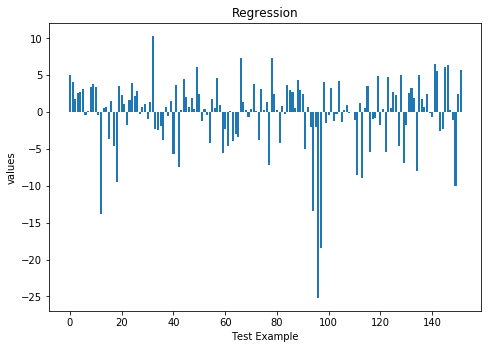

In [71]:
list1=[]
for i in range(len(residual_error_LR)):
    list1.append(i)
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
graph.bar(list1,residual_error_LR)
plt.title('Regression')
plt.ylabel('values')
plt.xlabel('Test Example')
plt.show()

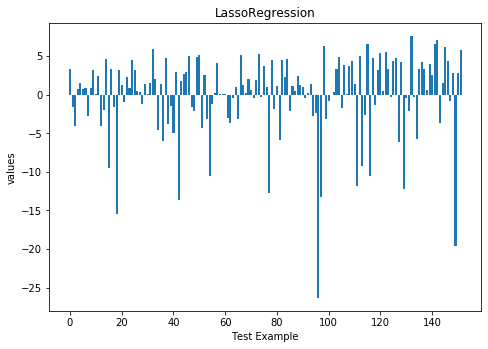

In [72]:
lst=[]
for i in range(len(residuals_lasso_full[2])):
    lst.append(i)

fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
graph.bar(lst,residuals_lasso_full[2])
plt.title('LassoRegression')
plt.ylabel('values')
plt.xlabel('Test Example')
plt.show()

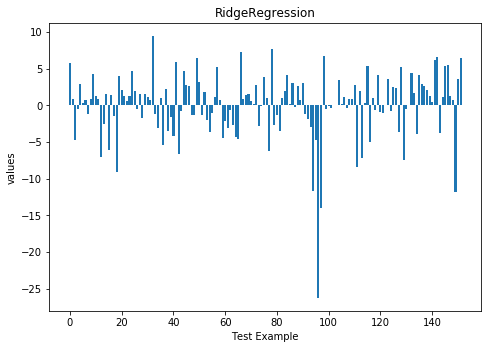

In [73]:
lst=[]
for i in range(len(residuals_ridge_full[3])):
    lst.append(i)

fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
graph.bar(lst,residuals_ridge_full[3])
plt.title('RidgeRegression')
plt.ylabel('values')
plt.xlabel('Test Example')
plt.show()

In [74]:
'''
    for learning part you can obsereve that: 
    1.the residuals increases as we change the type of regression from normal to Lasso or Ridge and this was expected because they increase the bias values to reduce the variance values which is quite eviatble.
    2.The error not necessarily decreases monotically by just increasing the regularization parametre(may lead to underfit).
    3.Training did not take very long time idk y.
'''


'\n    for learning part you can obsereve that: \n    1.the residuals increases as we change the type of regression from normal to Lasso or Ridge and this was expected because they increase the bias values to reduce the variance values which is quite eviatble.\n    2.The error not necessarily decreases monotically by just increasing the regularization parametre(may lead to underfit).\n    3.Training did not take very long time idk y.\n'

In [75]:
from sklearn.metrics import r2_score

In [76]:
print(r2_score(y_test,y))

0.7112260057484903


In [77]:
print(r2_score(y_train,predictionlr))

0.7434997532004697
